In [0]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import pandas as pd

In [0]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IND115datalabels.csv to IND115datalabels.csv
User uploaded file "IND115datalabels.csv" with length 157565 bytes


In [0]:
data = pd.read_csv('./IND115datalabels.csv')

In [0]:
#xm=data.values[:,0]
#ym=data.values[:,1]
#timesteps=10

X=data.values[:,[0,1]]

labeltrue=1-data.values[:,2]

m=X.shape[0]

#m,n=xm.shape

xm=MinMaxScaler(feature_range=(-1,1)).fit_transform(X)
#ym=preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(ym.reshape(-1,1))

print(xm.shape)
print(xm[0:10])

(8760, 2)
[[ 0.13047285 -0.10868031]
 [ 0.17688266 -0.08256881]
 [ 0.11033275 -0.04763585]
 [ 0.09544658 -0.06457304]
 [ 0.14273205 -0.06422018]
 [ 0.05604203 -0.07833451]
 [ 0.07180385 -0.0885674 ]
 [ 0.05516637 -0.07657022]
 [-0.00175131 -0.07904023]
 [ 0.05429072 -0.04728299]]


In [0]:
# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=15).fit(xm)
print(len(db.labels_))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

nlabel=len(labels)
for i in range(0,nlabel):
  if(labels[i]==-1):
    labels[i]=1


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) #- (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)



print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labeltrue, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labeltrue, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labeltrue, labels))
print("Adjusted Rand Index: %0.3f"
     % metrics.adjusted_rand_score(labeltrue, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labeltrue, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Accuracy score ",metrics.accuracy_score(labeltrue, labels, normalize=True))
print("Precision score ",metrics.precision_score(labeltrue,labels,average=None))
print("Recall score ",metrics.recall_score(labeltrue, labels, average=None))
print("f1 score ",metrics.f1_score(labeltrue, labels, average=None))

8760
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.144
Completeness: 0.391
V-measure: 0.210
Adjusted Rand Index: 0.318
Adjusted Mutual Information: 0.144


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Coefficient: 0.417
Accuracy score  0.9415525114155251
Precision score  [0.94331277 0.85207101]
Recall score  [0.99692459 0.22820919]
f1 score  [0.96937799 0.36      ]


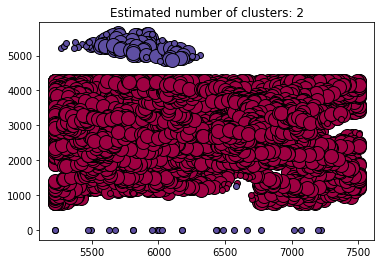

In [0]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()